# Feature extraction and reconstruction of Signal

In [1]:
#Import Libaries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
def soft_thresholding(x, thresh):
    return np.sign(x) * np.maximum(np.abs(x) - thresh, 0)

In [3]:
#X =>input
#Y => target
#lambda => regularization
#rho => tuning parameters

def admm_lasso(X, y, lambd, rho, max_iter=1000, tol=1e-4):

    #intialize remaining parameters
    m, n = X.shape
    beta = np.zeros(n)
    z = np.zeros(n)
    u = np.zeros(n)
    prev_beta = np.zeros(n)

    
    for _ in range(max_iter):
        
        # Update Beta
        try:
            beta = np.linalg.solve(X.T @ X + rho * np.eye(n), X.T @ y + rho * (z - u))
        except np.linalg.LinAlgError:
            print("Singular matrix encountered. Adjust your input or regularization parameter.")
            return None

        # Update z using soft-thresholding
        z = soft_thresholding(beta + u, lambd / rho)

        # Update u
        u += beta - z

        # Check for convergence
        if np.linalg.norm(beta - prev_beta) < tol:
            print("Converged after iterations.")
            break
        prev_beta = beta

    return beta

In [4]:
# Reconstruct the signal using the feature coefficients
def reconstruct_signal(X, beta):
    return X @ beta

In [5]:
# Generate synthetic audio data
np.random.seed(0)
X = np.random.randn(100, 10) 
true_beta = np.array([1, -1, 0, 0, 0, 0, 0, 0, 0, 0])
original_signal = X @ true_beta + 0.1 * np.random.randn(100)  
y = original_signal  

Converged after iterations.


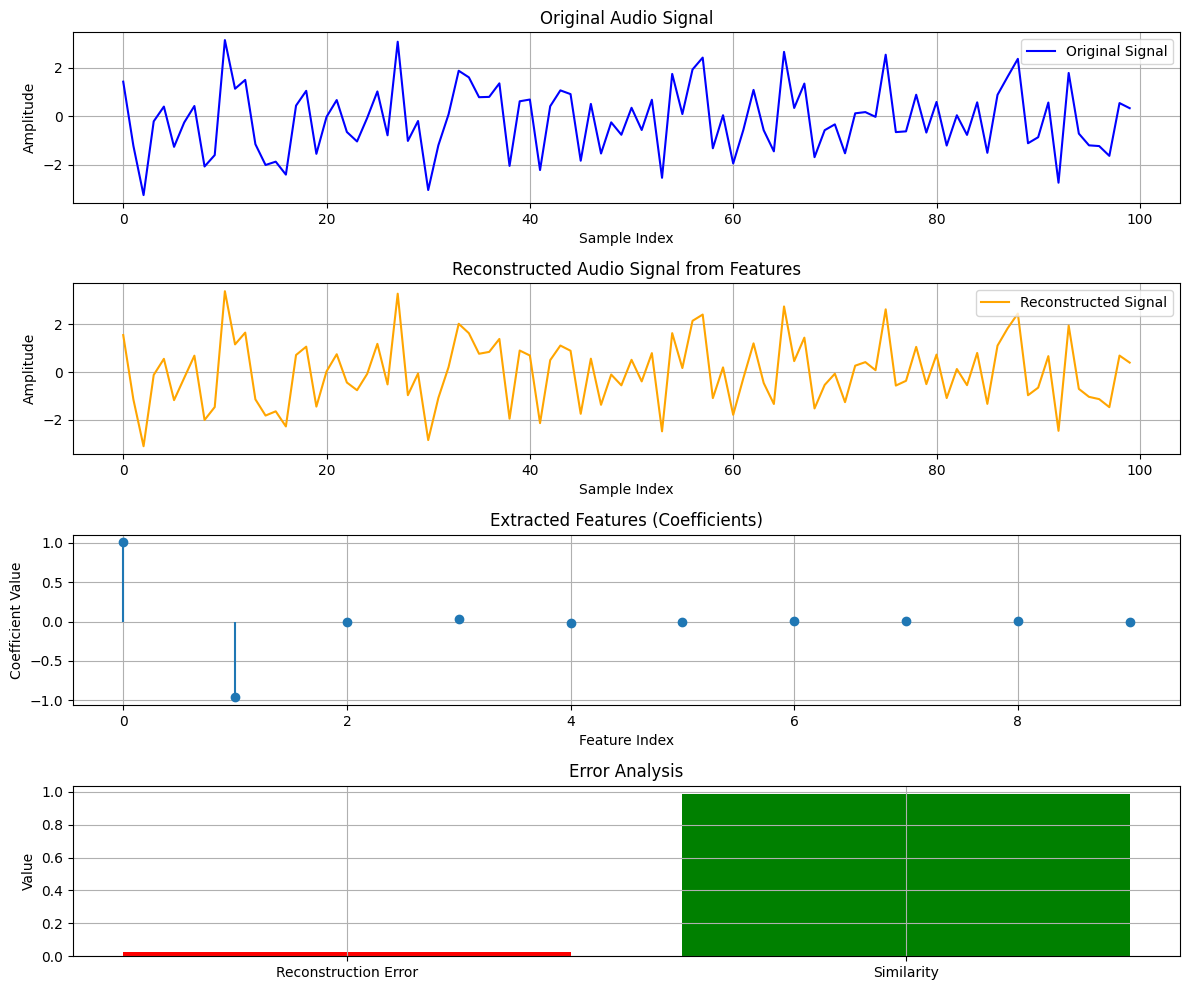

Reconstruction Error (MSE): 0.0242
Similarity Score: 0.9874


In [6]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lasso regression parameters
lambd = 0.1  
rho = 1.0    

# Feature extraction using lasso
coefficients = admm_lasso(X_scaled, y, lambd, rho)

if coefficients is not None:
    # Reconstruct audio 
    reconstructed_signal = reconstruct_signal(X_scaled, coefficients)

    # Calculate reconstruction error
    error = mean_squared_error(original_signal, reconstructed_signal)
    similarity = 1 - error / np.var(original_signal)

    # Plotting
    plt.figure(figsize=(12, 10))

    # Plot Original Signal
    plt.subplot(4, 1, 1)
    plt.plot(original_signal, label='Original Signal', color='blue')
    plt.title('Original Audio Signal')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()

    # Plot Reconstructed Signal
    plt.subplot(4, 1, 2)
    plt.plot(reconstructed_signal, label='Reconstructed Signal', color='orange')
    plt.title('Reconstructed Audio Signal from Features')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()

    # Plot Coefficients
    plt.subplot(4, 1, 3)
    plt.stem(coefficients, basefmt=" ")
    plt.title('Extracted Features (Coefficients)')
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient Value')
    plt.grid()

    # Plot Error Analysis
    plt.subplot(4, 1, 4)
    plt.bar(['Reconstruction Error', 'Similarity'], [error, similarity], color=['red', 'green'])
    plt.title('Error Analysis')
    plt.ylabel('Value')
    plt.grid()

    plt.tight_layout()
    plt.show()

    # Print out error and similarity
    print(f"Reconstruction Error (MSE): {error:.4f}")
    print(f"Similarity Score: {similarity:.4f}")
else:
    print("Lasso regression failed.")